<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/mlCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import csv

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import scipy
from sklearn.metrics import mean_absolute_error, mean_squared_error

from matplotlib.legend_handler import HandlerTuple
plt.set_loglevel("WARNING")

In [5]:
# set up color palette
palett = sns.color_palette(n_colors=8)
palett_as_hex = palett.as_hex()

c1, c2, c3, c4, c5, c7 = (
    palett_as_hex[0],
    palett_as_hex[1],
    palett_as_hex[2],
    palett_as_hex[3],
    palett_as_hex[4],
    palett_as_hex[6],
)
c8 = matplotlib.colors.to_rgba("k", alpha=0.1)
c8_2 = matplotlib.colors.to_rgba("k", alpha=0.01)
# c5 = lila
# c7= rosa

In [6]:
# data = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/combined_EXS_and_UV_dataset.csv")
data = pd.read_csv("sample_data/EXS_and_UV.csv")
# data = data.dropna(subset=["dG (corrected)"])

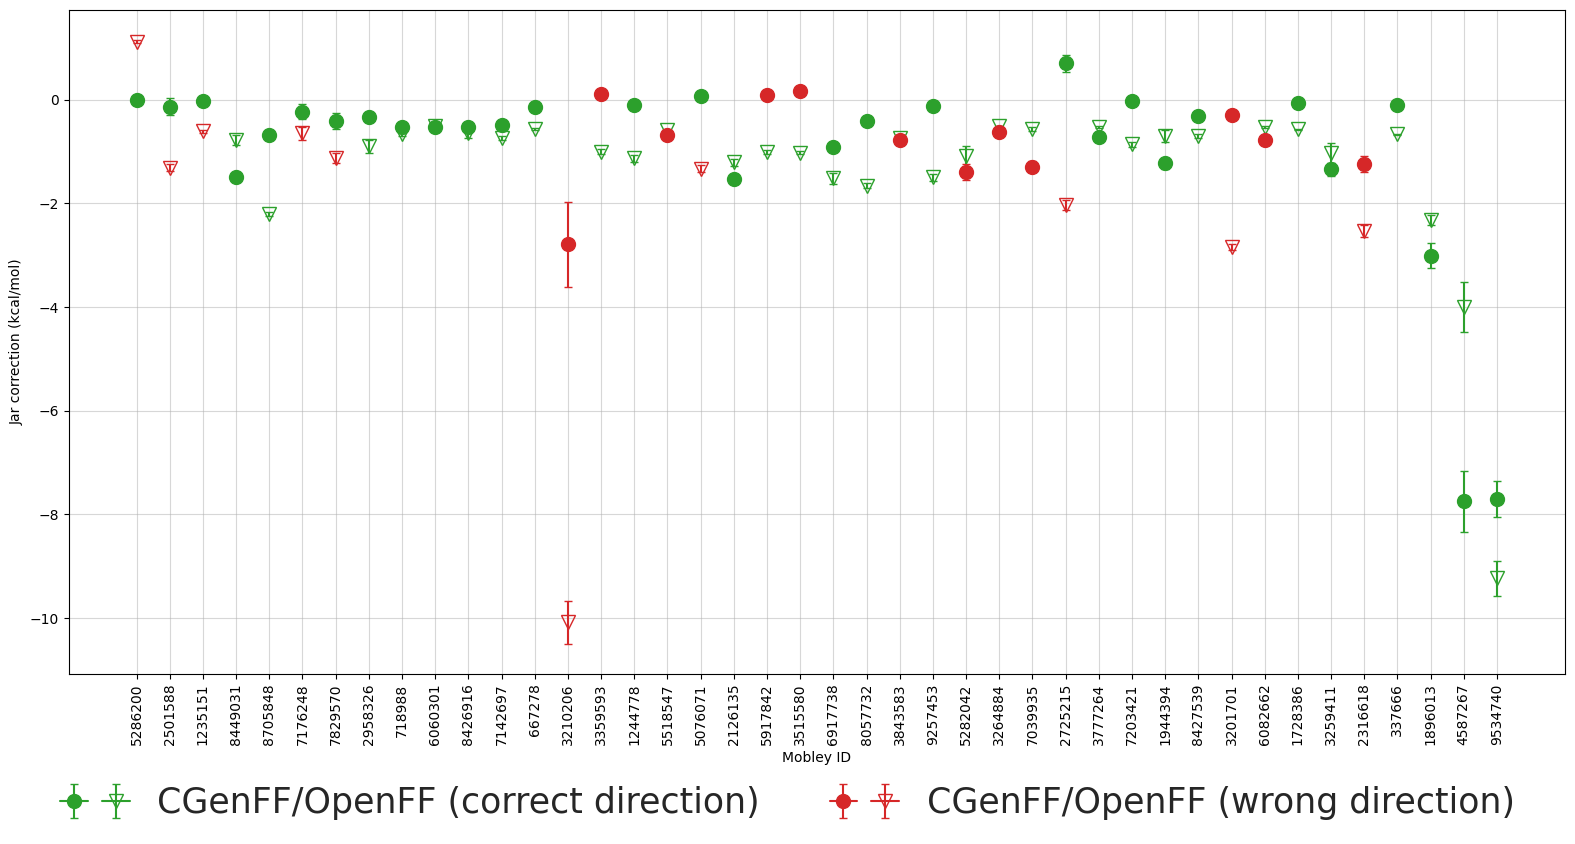

In [7]:
# data = data.dropna(subset=["Crooks result"])
fig, axs = plt.subplots(1, 1, figsize=(16, 8))


data = data.sort_values(by="Exp [kcal/mol]", ascending=False)

sns.set_theme(
    style="white",
    rc={
        "font.size": 15,
        "legend.fontsize": 25,
        "lines.markersize": 10,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
    },
)

wrongDirection = []
for index, row in data.iterrows():
    if not np.isnan(data["Exp [kcal/mol]"][index]):
        noCorrection = np.abs(
            data["Exp [kcal/mol]"][index] - data["dG (TF) lrc"][index]
        )
        corrected = np.abs(
            data["Exp [kcal/mol]"][index]
            - data["Jar result"][index]
        )
        noCorrection_exs = np.abs(
            data["Exp [kcal/mol]"][index] - data["MM-ASFE [kcal/mol]"][index]
        )
        corrected_exs = np.abs(
            data["Exp [kcal/mol]"][index]
            - data["ML-ASFE [kcal/mol]"][index]
        )
        if noCorrection > corrected and np.abs(data["Jar correction"][index]) > 0.5:
            axs.errorbar(
                x=data["Mol_ID"][index].split("_")[-1],
                y=data["Jar correction"][index],
                yerr=data["error"][index],
                color=c3,
                marker="v",
                #ecolor="black",
                capsize=3,
                markerfacecolor = "none",
                # facecolors = "none",
                #markeredgewidth = 3,
                label = "CGenFF"
            )

        if noCorrection_exs > corrected_exs and np.abs(data["Jar correction"][index]) > 0.5:

            axs.errorbar(
                x=data["Mol_ID"][index].split("_")[-1],
                y=(-data["MM-ASFE [kcal/mol]"][index]+data["ML-ASFE [kcal/mol]"][index]),
                yerr=data["ML-ASFE-err [kcal/mol]"][index],
                color=c3,
                marker="o",
                #ecolor="black",
                capsize=3,
                label = "OpenFF",
            )


        if noCorrection < corrected and np.abs(data["Jar correction"][index]) > 0.5:
            axs.errorbar(
                x=data["Mol_ID"][index].split("_")[-1],
                y=data["Jar correction"][index],
                yerr=data["error"][index],
                color=c4,
                marker="v",
                #ecolor="black",
                capsize=3,
                markerfacecolor = "none",
                # facecolors = "none",
                #markeredgewidth = 3,
                label = "CGenFF",
            )


        if noCorrection_exs < corrected_exs and np.abs(data["Jar correction"][index]) > 0.5:

            axs.errorbar(
                x=data["Mol_ID"][index].split("_")[-1],
                y=(-data["MM-ASFE [kcal/mol]"][index]+data["ML-ASFE [kcal/mol]"][index]),
                yerr=data["ML-ASFE-err [kcal/mol]"][index],
                color=c4,
                marker="o",
                # ecolor="gray",
                capsize=3,
                label = "OpenFF",
            )

axs.set_ylabel("Jar correction (kcal/mol)")
axs.set_xlabel("Mobley ID")

lines_labels = [axs.get_legend_handles_labels() for axs in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(
    [(lines[2],lines[-2]),(lines[-15],lines[3])],
    ["CGenFF/OpenFF (correct direction)","CGenFF/OpenFF (wrong direction)"],
    loc="lower center",
    ncol=4,
    frameon=False,
    bbox_to_anchor=(0.5, -0.08),
    fontsize=25,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)


plt.xticks(rotation=90)
axs.grid(alpha=0.5)


plt.tight_layout()
plt.savefig("ml_correction.pdf",bbox_inches="tight")

In [8]:
data.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Mol_ID', 'Exp [kcal/mol]',
       'MM-ASFE [kcal/mol]', 'MM-ASFE-err [kcal/mol]', 'ML-ASFE [kcal/mol]',
       'ML-ASFE-err [kcal/mol]', 'solvent_dG', 'solvent_dG_err',
       'solvent_dG_std', 'vac_dG', 'vac_dG_err', 'vac_dG_std', ' SMILES',
       ' iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem)',
       ' experimental value (kcal/mol)',
       ' experimental uncertainty (kcal/mol)',
       ' Mobley group calculated value (GAFF) (kcal/mol)',
       ' calculated uncertainty (kcal/mol)',
       ' experimental reference (original or paper this value was taken from)',
       ' calculated reference', ' text notes.', 'dG (TF)', 'std (TF)',
       'dG (TF) lrc', 'lrc', 'lrc std', 'lrc diff', 'nr intst', 'nr waters',
       'box length', 'diff', 'diff GAFF', 'functional group', 'Crooks result',
       'Crooks correction', 'error', 'Jar result', 'Jar correction'],
      dtype='object')

In [9]:
### EXS results with MM and ML/MM description ###
# plt.rcParams["figure.figsize"] = (7, 7)
# plt.scatter(data["Exp [kcal/mol]"],data["MM-ASFE [kcal/mol]"],alpha=0.4,label="MM",color=c1)
# plt.scatter(data["Exp [kcal/mol]"],data["ML-ASFE [kcal/mol]"],alpha=0.3,label="ML/MM",color=c2)
# plt.axline( (0,0),slope=1,linestyle='--',color='black')
# plt.legend(frameon=False)

In [10]:
data = pd.read_csv("sample_data/EXS_and_UV.csv")
data["MM-ML"]=np.abs(data["MM-ASFE [kcal/mol]"]-data["ML-ASFE [kcal/mol]"])
data["Diff EXS"]=np.abs(data["Exp [kcal/mol]"]-data["MM-ASFE [kcal/mol]"])

In [11]:
data=data.dropna(subset=["Crooks correction"])
data = data.sort_values(by="diff", ascending=True)

In [12]:
data = data[-93::]

Wrong direction: 29.35% of 92 compounds


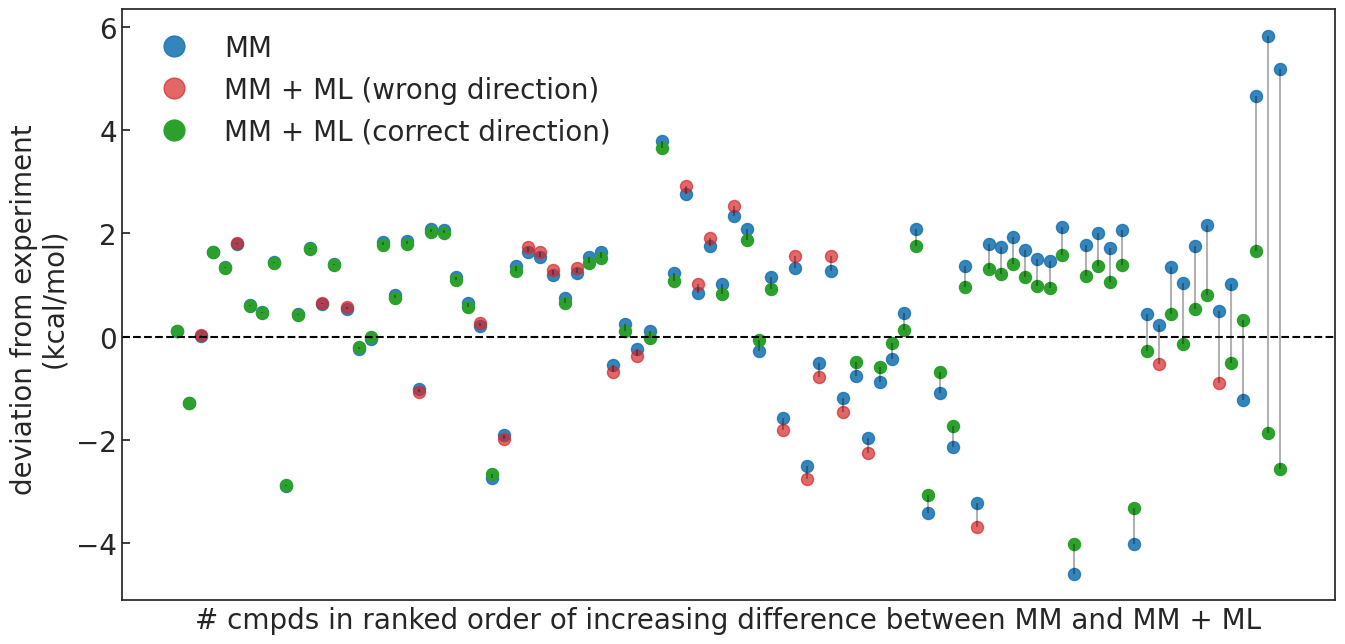

In [13]:
sns.set_theme(
    style="white",
    rc={
        "font.size": 25,
        "legend.fontsize": 20,
        "axes.labelsize": 20,
        "lines.markersize": 10,
        "xtick.labelsize": 12,
        "ytick.left": True,
        "ytick.direction": "in",
        "ytick.labelsize": 20,
    },
)

plt.rcParams["figure.figsize"] = (14, 7)

data = data.sort_values(by="MM-ML", ascending=True)[-100::]

wrong = []
correct = []
for index, row in data.iterrows():
    if not np.isnan(data["Exp [kcal/mol]"][index]):
        noCorrection = np.abs(
            data["Exp [kcal/mol]"][index] - data["MM-ASFE [kcal/mol]"][index]
        )
        corrected = np.abs(
            data["Exp [kcal/mol]"][index]
            - data["ML-ASFE [kcal/mol]"][index]
        )
        if np.abs(data["MM-ML"][index]) > 0.001:
            plt.scatter(
                data["Mol_ID"][index],
                (
                    (data["Exp [kcal/mol]"][index] * -1)
                    + data["MM-ASFE [kcal/mol]"][index]
                ),
                s=75,
                # fmt="o",
                # capsize=3,
                # yerr=data["std (TF)"][index],
                color=c1,
                alpha=0.9,
            )

            if noCorrection >= corrected:
                plt.scatter(
                    data["Mol_ID"][index],
                    (
                        (data["Exp [kcal/mol]"][index] * -1)
                        + data["ML-ASFE [kcal/mol]"][index]
                    ),
                    s=75,
                    color=c3,
                )
                correct.append(1)
            else:
                plt.scatter(
                    data["Mol_ID"][index],
                    (
                        (data["Exp [kcal/mol]"][index] * -1)
                        + data["ML-ASFE [kcal/mol]"][index]
                    ),
                    s=75,
                    color=c4,
                    alpha=0.7,
                )
                wrong.append(1)

            plt.vlines(
                x=data["Mol_ID"][index],
                ymin=(
                    (data["Exp [kcal/mol]"][index] * -1)
                    + data["MM-ASFE [kcal/mol]"][index]
                ),
                ymax=(
                    (data["Exp [kcal/mol]"][index] * -1)
                    + data["ML-ASFE [kcal/mol]"][index]
                ),
                colors="black",
                alpha=0.3,
            )


blue_patch = matplotlib.lines.Line2D(
    [0], [0], marker="o", color=c1, label="MM", ls="None", alpha=0.9, ms=15
)
red_patch = matplotlib.lines.Line2D(
    [0],
    [0],
    marker="o",
    color=c4,
    label="MM + ML (wrong direction)",
    alpha=0.7,
    ls="None",
    ms=15,
)
green_patch = matplotlib.lines.Line2D(
    [0],
    [0],
    marker="o",
    color=c3,
    label="MM + ML (correct direction)",
    ls="None",
    ms=15,
)

plt.legend(
    handles=[blue_patch, red_patch, green_patch], frameon=False, loc="upper left"
)


plt.axhline(y=0, linestyle="--", color="black")
# plt.axhline(y=-2, linestyle="--", color="black")
# plt.axhline(y=2, linestyle="--", color="black")
plt.xlabel(
    "# cmpds in ranked order of increasing difference between MM and MM + ML",
    fontsize=20,
)
plt.ylabel("deviation from experiment \n (kcal/mol)")
plt.xticks([])
plt.tight_layout()
print(f"Wrong direction: {round(len(wrong)/len(correct+wrong)*100,2)}% of {len(correct+wrong)} compounds")
plt.savefig("overview.pdf", bbox_inches="tight")

In [14]:
def bootstrap_metric(fct, x_values, y_values, p_value=False):
    bootstrapped_metric = []
    # bootstrap metric to generate test distribution
    for _ in range(1000):
        indices = np.random.choice(
            range(0, len(x_values)), size=len(x_values), replace=True
        )
        x_selection = np.take(x_values, indices)
        y_selection = np.take(y_values, indices)
        if p_value:
            r = fct(x_selection, y_selection)[0]
        else:
            r = fct(x_selection, y_selection)
        bootstrapped_metric.append(r)

    # define 95% CI
    alpha = 5.0
    lower_p = alpha / 2.0
    # get value at or near percentile (take a look at the definition of percentile if
    # you have less than 100 values to make sure you understand what is happening)
    lower = np.percentile(bootstrapped_metric, lower_p)
    upper_p = (100 - alpha) + (alpha / 2.0)
    upper = np.percentile(bootstrapped_metric, upper_p)
    # calculate true mean
    if p_value:
        mean = fct(x_values, y_values)[0]
    else:
        mean = fct(x_values, y_values)
    return mean, lower, upper

def calculate_statistics(x_values, y_values):
    # bootstrap RMSE
    def calc_rmse(x_values, y_values):
        return np.sqrt(mean_squared_error(x_values, y_values))

    rmse_mean, rmse_lower, rmse_upper = bootstrap_metric(calc_rmse, x_values, y_values)
    print(
        f"RMSE:  {round(rmse_mean, 2)} [{round(rmse_lower,2)}, {round(rmse_upper,2)}]"
    )

    # bootstrap MAE
    mae_mean, mae_lower, mae_upper = bootstrap_metric(
        mean_absolute_error, x_values, y_values
    )
    print(f"MAE:  {round(mae_mean, 2)} [{round(mae_lower,2)}, {round(mae_upper,2)}]")

    # bootstrap Pearson
    pearson_mean, pearson_lower, pearson_upper = bootstrap_metric(
        scipy.stats.pearsonr, x_values, y_values, p_value=True
    )
    print(
        f"Pearson correlation:  {round(pearson_mean, 2)} [{round(pearson_lower,2)}, {round(pearson_upper,2)}]"
    )

    # bootstrap Spearman
    spearman_mean, spearman_lower, spearman_upper = bootstrap_metric(
        scipy.stats.spearmanr, x_values, y_values, p_value=True
    )
    print(
        f"Spearman's correlation:  {round(spearman_mean, 2)} [{round(spearman_lower,2)}, {round(spearman_upper,2)}]"
    )

    # bootstrap Kendalltau
    kendall_mean, kendall_lower, kendall_upper = bootstrap_metric(
        scipy.stats.kendalltau, x_values, y_values, p_value=True
    )
    print(
        f"Kendalltau: {round(kendall_mean, 2)} [{round(kendall_lower,2)}, {round(kendall_upper,2)}]"
    )

    return (
        round(rmse_mean, 2),
        round(mae_mean, 2),
        round(pearson_mean, 2),
        round(spearman_mean, 2),
        round(kendall_mean, 2),
    )

In [15]:
data = pd.read_csv("sample_data/EXS_and_UV.csv")
# data=data.dropna(subset=["Crooks correction"]) # if only the 92 molecules in common are of interest
print(f"###### Without Corretion -- pure MM results ######")
calculate_statistics(data["Exp [kcal/mol]"],data["MM-ASFE [kcal/mol]"])
print(f"###### Corrected results ######")
calculate_statistics(data["Exp [kcal/mol]"],data["ML-ASFE [kcal/mol]"])

###### Without Corretion -- pure MM results ######
RMSE:  1.33 [1.23, 1.44]
MAE:  1.01 [0.94, 1.08]
Pearson correlation:  0.95 [0.94, 0.96]
Spearman's correlation:  0.95 [0.93, 0.96]
Kendalltau: 0.81 [0.79, 0.83]
###### Corrected results ######
RMSE:  1.3 [1.19, 1.41]
MAE:  0.98 [0.92, 1.05]
Pearson correlation:  0.96 [0.94, 0.97]
Spearman's correlation:  0.95 [0.94, 0.96]
Kendalltau: 0.82 [0.8, 0.84]


(1.3, 0.98, 0.96, 0.95, 0.82)

In [16]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 28.4 MB/s eta 0:00:00


In [17]:
data = pd.read_csv("sample_data/EXS_and_UV.csv")
data.loc[:, "numRotBonds"] = np.nan
data["MM-ML"]=np.abs(data["MM-ASFE [kcal/mol]"]-data["ML-ASFE [kcal/mol]"])

numRotBonds = {}
for index, row in data.iterrows():
    try:
      smi = row[" SMILES"].strip()
      correction = row["MM-ML"]
      mol = Chem.MolFromSmiles(smi)
      # display(mol)
      rotBonds = rdMolDescriptors.CalcNumRotatableBonds(mol)
      data.loc[index, "numRotBonds"] = rotBonds
      # print(rotBonds)
      try:
          numRotBonds[rotBonds].append(correction)

      except KeyError:
          numRotBonds[rotBonds] = []
          numRotBonds[rotBonds].append(correction)
    except AttributeError:
      pass

In [18]:
# data = data.drop(data[data['numRotBonds'] < 5 ].index)

In [19]:
print(f"###### Without Corretion -- pure MM results ######")
calculate_statistics(data["Exp [kcal/mol]"],data["MM-ASFE [kcal/mol]"])
print(f"###### Corrected results ######")
calculate_statistics(data["Exp [kcal/mol]"],data["ML-ASFE [kcal/mol]"])

###### Without Corretion -- pure MM results ######
RMSE:  1.33 [1.22, 1.44]
MAE:  1.01 [0.94, 1.08]
Pearson correlation:  0.95 [0.94, 0.96]
Spearman's correlation:  0.95 [0.93, 0.96]
Kendalltau: 0.81 [0.79, 0.83]
###### Corrected results ######
RMSE:  1.3 [1.19, 1.41]
MAE:  0.98 [0.91, 1.05]
Pearson correlation:  0.96 [0.94, 0.97]
Spearman's correlation:  0.95 [0.94, 0.96]
Kendalltau: 0.82 [0.8, 0.84]


(1.3, 0.98, 0.96, 0.95, 0.82)

589

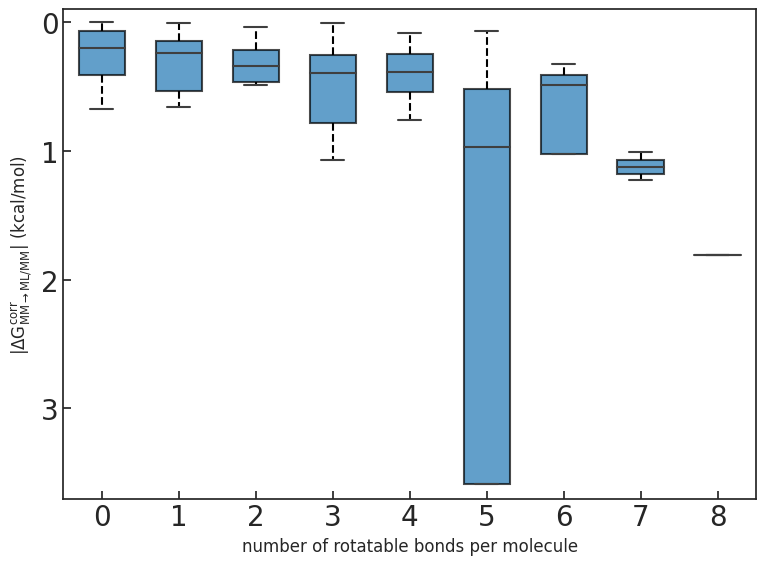

In [20]:
sns.reset_orig
sns.set_theme(
    style="white",
    rc={
        "font.size": 18,
        "legend.fontsize": 10,
        "lines.markersize": 10,
        "xtick.bottom": True,
        "xtick.direction": "in",
        "xtick.labelsize": 20,
        "ytick.left": True,
        "ytick.direction": "in",
        "ytick.labelsize": 20,
    },
)

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.boxplot(
    # data=data,
    x=[int(i) for i in data["numRotBonds"].to_list()],
    y=np.abs(data["Crooks correction"]),
    # hue="Force Field",
    ax=ax1,
    width=0.6,
    # medianprops=medianprops,
    showmeans=False,
    # meanprops=meanprops,
    # order=labeling.index,
    color=c1,
    saturation=1,
    linewidth=1.5,
    # palette={"GAFF": "C1", "CGenFF": "C0"},
    fliersize=12,
    autorange=True,
    # orient="h",
    showfliers=False,
    whis=0.8,
    boxprops=dict(facecolor=c1, alpha=0.7, edgecolor="black", linewidth=1.5),
    whiskerprops=dict(linestyle="--", linewidth=1.5, color="black"),
)

ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel(r"$|\Delta \mathrm{G}^{\mathrm{corr}}_{\mathrm{MM}\rightarrow\mathrm{ML/MM}}|$ (kcal/mol)")
plt.xlabel("number of rotatable bonds per molecule")

plt.ylim([3.7,-0.1])
plt.tight_layout()
plt.savefig("boxplot_numRotBonds.pdf",bbox_inches='tight')
len(data)

In [31]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Mol_ID,Exp [kcal/mol],MM-ASFE [kcal/mol],MM-ASFE-err [kcal/mol],ML-ASFE [kcal/mol],ML-ASFE-err [kcal/mol],solvent_dG,solvent_dG_err,...,diff,diff GAFF,functional group,Crooks result,Crooks correction,error,Jar result,Jar correction,numRotBonds,MM-ML
0,0,0,mobley_1743409,-5.71,-7.609,0.059,-7.871,0.080,-382771.892,0.041,...,1.03,2.97,carboxylic acid ester,NaN,NaN,NaN,NaN,NaN,5.0,0.262
1,1,1,mobley_9979854,-4.20,-3.861,0.031,-4.461,0.039,-306710.274,0.019,...,1.68,0.71,secondary alcohol,NaN,NaN,NaN,NaN,NaN,0.0,0.600
2,2,2,mobley_1873346,-0.90,-0.799,0.027,-0.815,0.031,-169252.297,0.009,...,0.94,0.11,aromatic,NaN,NaN,NaN,NaN,NaN,0.0,0.016
3,3,3,mobley_4715906,1.58,1.765,0.030,1.822,0.032,-196047.106,0.008,...,0.79,0.11,alkane,NaN,NaN,NaN,NaN,NaN,0.0,0.057
4,4,4,mobley_3169935,-4.91,-5.328,0.029,-6.073,0.033,-465705.710,0.013,...,1.34,0.06,primary amine,NaN,NaN,NaN,NaN,NaN,0.0,0.745


In [21]:
def csv_to_dict(file_path):
    # Initialize an empty dictionary to store the data
    data_dict = {}

    # Open the file for reading
    with open(file_path, 'r') as csvfile:
        # Create a CSV reader object
        csvreader = csv.reader(csvfile)

        # Read the first row to get the keys (column names)
        # keys = next(csvreader)
        keys = next(csvreader)
        # Initialize lists for each key
        for key in keys:
            data_dict[key] = []

        # Read the rest of the rows and populate the dictionary
        for row in csvreader:
            for i, key in enumerate(keys):
                data_dict[key].append(row[i])

    return data_dict

# Example usage
file_path = "sample_data/EXS_and_UV.csv"  # Replace this with your actual file path
data_dict = csv_to_dict(file_path)

In [24]:
mm_asfe = np.array(data_dict['MM-ASFE [kcal/mol]'], dtype=float)
exp = np.array(data_dict['Exp [kcal/mol]'], dtype=float)
qml_asfe = np.array(data_dict['ML-ASFE [kcal/mol]'], dtype=float)

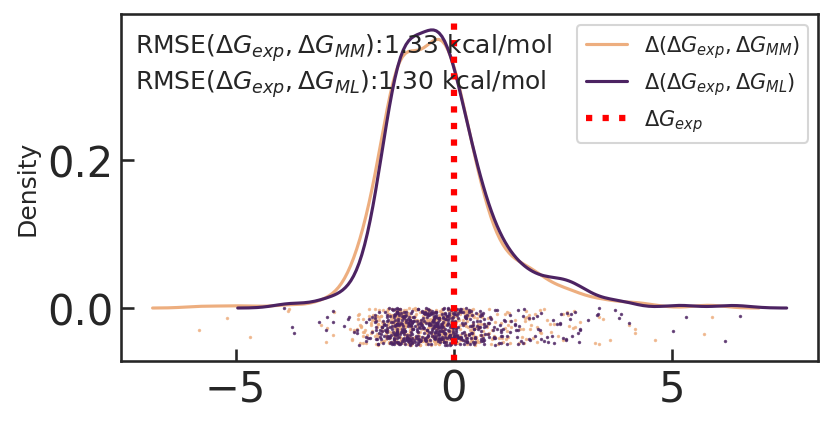

In [23]:
colors = sns.color_palette("flare", n_colors = 201)

plt.figure(figsize=(6, 3), dpi=150)

sns.kdeplot(data=exp-mm_asfe, c=colors[1],label=r'$\Delta(\Delta G_{exp}, \Delta G_{MM}$)')
sns.kdeplot(data=exp-qml_asfe, c=colors[-1], label=r'$\Delta(\Delta G_{exp}, \Delta G_{ML}$)')
plt.axvline(x=0.0, color="red", lw=3, ls=":", label=r"$\Delta G_{exp}$")
plt.scatter(
    exp-mm_asfe,
    np.random.uniform(low= -.05, high=0.0, size=len(qml_asfe)),
    s=0.4,
    color=colors[1],
    alpha=0.8,
)
plt.scatter(
    exp-qml_asfe,
    np.random.uniform(low= -.05, high=0, size=len(qml_asfe)),
    s=0.4,
    color=colors[-1],
    alpha=0.8,
)

axs = plt.gca()
rmse_mm = np.sqrt(np.mean((exp-mm_asfe)**2))
rmse_qml = np.sqrt(np.mean((exp-qml_asfe)**2))

# place a text box in upper left in axes coords
axs.text(0.02, 0.95, f'RMSE$(\Delta G_{{exp}}, \Delta G_{{MM}})$:{rmse_mm:.2f} kcal/mol\nRMSE$(\Delta G_{{exp}}, \Delta G_{{ML}}$):{rmse_qml:.2f} kcal/mol', transform=axs.transAxes, fontsize=12,
        verticalalignment='top')


plt.legend()
plt.show()

In [32]:
file_path = "sample_data/CGenFF_data.csv"  # Replace this with your actual file path
data_dict = csv_to_dict(file_path)

mm_asfe = np.array(data_dict['dG (TF) lrc'], dtype=float)
exp = np.array(data_dict[' experimental value (kcal/mol)'], dtype=float)
qml_asfe = np.array(data_dict['Jar result'], dtype=float)

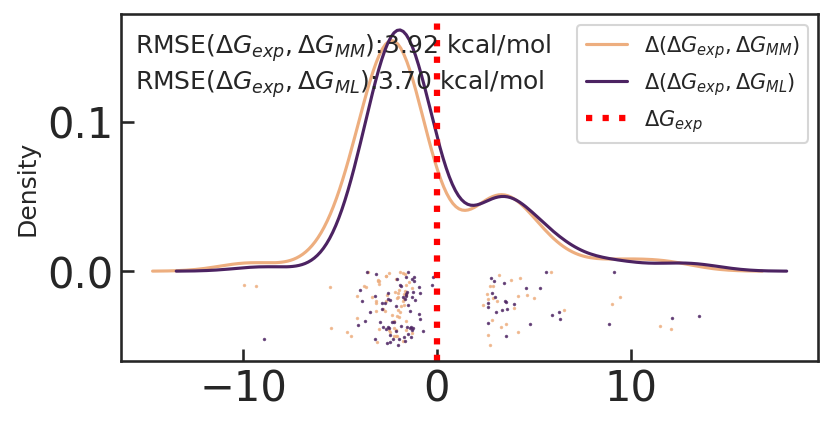

In [33]:
colors = sns.color_palette("flare", n_colors = 201)

plt.figure(figsize=(6, 3), dpi=150)

sns.kdeplot(data=exp-mm_asfe, c=colors[1],label=r'$\Delta(\Delta G_{exp}, \Delta G_{MM}$)')
sns.kdeplot(data=exp-qml_asfe, c=colors[-1], label=r'$\Delta(\Delta G_{exp}, \Delta G_{ML}$)')
plt.axvline(x=0.0, color="red", lw=3, ls=":", label=r"$\Delta G_{exp}$")
plt.scatter(
    exp-mm_asfe,
    np.random.uniform(low= -.05, high=0.0, size=len(qml_asfe)),
    s=0.4,
    color=colors[1],
    alpha=0.8,
)
plt.scatter(
    exp-qml_asfe,
    np.random.uniform(low= -.05, high=0, size=len(qml_asfe)),
    s=0.4,
    color=colors[-1],
    alpha=0.8,
)

axs = plt.gca()
rmse_mm = np.sqrt(np.mean((exp-mm_asfe)**2))
rmse_qml = np.sqrt(np.mean((exp-qml_asfe)**2))

# place a text box in upper left in axes coords
axs.text(0.02, 0.95, f'RMSE$(\Delta G_{{exp}}, \Delta G_{{MM}})$:{rmse_mm:.2f} kcal/mol\nRMSE$(\Delta G_{{exp}}, \Delta G_{{ML}}$):{rmse_qml:.2f} kcal/mol', transform=axs.transAxes, fontsize=12,
        verticalalignment='top')


plt.legend()
plt.show()

In [34]:
cgenff_data = pd.read_csv("sample_data/CGenFF_data.csv")
print(f"###### Without Corretion -- pure MM results ######")
calculate_statistics(cgenff_data[" experimental value (kcal/mol)"],cgenff_data["dG (TF) lrc"])
print(f"###### Corrected results ######")
calculate_statistics(cgenff_data[" experimental value (kcal/mol)"],cgenff_data["Jar result"])

###### Without Corretion -- pure MM results ######
RMSE:  3.92 [3.22, 4.63]
MAE:  3.28 [2.87, 3.76]
Pearson correlation:  0.72 [0.6, 0.81]
Spearman's correlation:  0.64 [0.47, 0.77]
Kendalltau: 0.51 [0.37, 0.64]
###### Corrected results ######
RMSE:  3.7 [2.94, 4.46]
MAE:  2.93 [2.53, 3.41]
Pearson correlation:  0.77 [0.63, 0.85]
Spearman's correlation:  0.64 [0.47, 0.78]
Kendalltau: 0.51 [0.37, 0.63]


(3.7, 2.93, 0.77, 0.64, 0.51)